# Final Checks for model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_csv(f"D:/Docs/train_2.csv", encoding='mac_roman')
df = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')
df1 = pd.read_csv(f"D:/SYED/Docs/test.csv", encoding='mac_roman')
#df.hist(bins = 50, figsize = (20, 15))
#plt.show()

## 1. Use ONLY compliance available columns

In [2]:
df = df[df['compliance'].notna()]
df['fine_amount'] = df['fine_amount'].fillna(0)
df['compliance'].value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

## 2. Build the model - RandomForest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
feature_names_tickets = ['fine_amount', 'late_fee', 'discount_amount', 'judgment_amount']
feature_names_test = ['fine_amount', 'late_fee', 'discount_amount', 'judgment_amount']
X_tickets = df[feature_names_tickets]
y_tickets = df['compliance']
X_test_new = df1[feature_names_test]

#Test size is chosen to get X_test value of 61,001 as the same is provided test data
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, test_size = 0.38153900, random_state = 0)
clf = RandomForestClassifier(n_estimators = 100)

# First we need to load our test dataset
df1['fine_amount'] = df1['fine_amount'].fillna(0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_new)
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9055753184374027


## 3. Check ROC / AUC (Main test split)

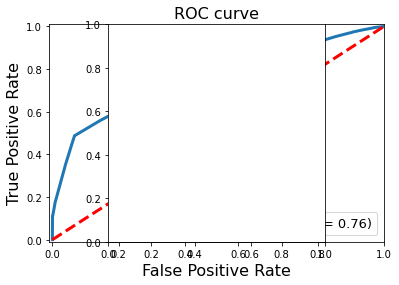

In [11]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

## 4. Check ROC / AUC (Real Test Data)

In [12]:
X_test_new.head(3)

,fine_amount,late_fee,discount_amount,judgment_amount
0,200,20.0,0,250.0
1,1000,100.0,0,1130.0
2,100,10.0,0,140.0


In [13]:
pred_values_new = pd.DataFrame(clf.predict_proba(X_test_new)[:, 1], df1.ticket_id) 
result = pred_values_new.squeeze()
result.to_csv('result_pred_RF-new_series.csv')